In [1]:
pip install pydeseq2

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pydeseq2.dds import DeseqDataSet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from pydeseq2.ds import DeseqStats

In [3]:
counts = pd.read_csv('Proteomics_Data.csv')
counts

,Accession,Description,Abundance: M1,Abundance: M2,Abundance: M3,Abundance: C1,Abundance: C2,Abundance: C3
0,Q8VDD5,Myosin-9 OS=Mus musculus OX=10090 GN=Myh9 PE=1...,1937.8,70816.4,230775.6,2271.7,1902.6,3468.0
1,Q9JMH9,Unconventional myosin-XVIIIa OS=Mus musculus O...,1002.0,13119.3,37078.6,770.3,624.4,718.4
2,P08032,"Spectrin alpha chain, erythrocytic 1 OS=Mus mu...",735.5,6590.5,23275.1,314.9,289.2,1098.0
3,Q9JKF1,Ras GTPase-activating-like protein IQGAP1 OS=M...,7381.8,6223.9,7076.9,13530.4,4649.8,4436.2
4,O08638,Myosin-11 OS=Mus musculus OX=10090 GN=Myh11 PE...,70.2,1417.8,5875.2,50.9,22.8,46.5
...,...,...,...,...,...,...,...,...
2127,Q3V2C1,Keratin-associated protein 9-3 OS=Mus musculus...,14.0,8.3,14.6,9.6,NaN,314.8
2128,Q5EBI0,Solute carrier family 26 member 10 OS=Mus musc...,NaN,NaN,NaN,NaN,NaN,NaN
2129,Q9DBL1,Short/branched chain specific acyl-CoA dehydro...,NaN,NaN,NaN,NaN,NaN,NaN
2130,Q5SW28,Phosphoinositide 3-kinase regulatory subunit 5...,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Remove rows that contain any NaN values
counts = counts.dropna()
counts

,Accession,Description,Abundance: M1,Abundance: M2,Abundance: M3,Abundance: C1,Abundance: C2,Abundance: C3
0,Q8VDD5,Myosin-9 OS=Mus musculus OX=10090 GN=Myh9 PE=1...,1937.8,70816.4,230775.6,2271.7,1902.6,3468.0
1,Q9JMH9,Unconventional myosin-XVIIIa OS=Mus musculus O...,1002.0,13119.3,37078.6,770.3,624.4,718.4
2,P08032,"Spectrin alpha chain, erythrocytic 1 OS=Mus mu...",735.5,6590.5,23275.1,314.9,289.2,1098.0
3,Q9JKF1,Ras GTPase-activating-like protein IQGAP1 OS=M...,7381.8,6223.9,7076.9,13530.4,4649.8,4436.2
4,O08638,Myosin-11 OS=Mus musculus OX=10090 GN=Myh11 PE...,70.2,1417.8,5875.2,50.9,22.8,46.5
...,...,...,...,...,...,...,...,...
2100,Q3U108,AT-rich interactive domain-containing protein ...,194.3,239.9,353.8,6.3,11.2,11.5
2101,Q5ND52,"rRNA methyltransferase 3, mitochondrial OS=Mus...",201.8,202.7,270.5,7.8,6.5,4.3
2111,Q99PH1,Leucine-rich repeat-containing protein 4 OS=Mu...,183.2,50.9,64.1,163.9,131.0,89.1
2123,P97930,Thymidylate kinase OS=Mus musculus OX=10090 GN...,23.1,27.9,30.7,9.8,10.4,13.4


In [10]:
counts = counts.set_index(['Accession', 'Description'])
counts

,,M1,M2,M3,C1,C2,C3
Accession,Description,,,,,,
Q8VDD5,Myosin-9 OS=Mus musculus OX=10090 GN=Myh9 PE=1 SV=4,1937.8,70816.4,230775.6,2271.7,1902.6,3468.0
Q9JMH9,Unconventional myosin-XVIIIa OS=Mus musculus OX=10090 GN=Myo18a PE=1 SV=2,1002.0,13119.3,37078.6,770.3,624.4,718.4
P08032,"Spectrin alpha chain, erythrocytic 1 OS=Mus musculus OX=10090 GN=Spta1 PE=1 SV=3",735.5,6590.5,23275.1,314.9,289.2,1098.0
Q9JKF1,Ras GTPase-activating-like protein IQGAP1 OS=Mus musculus OX=10090 GN=Iqgap1 PE=1 SV=2,7381.8,6223.9,7076.9,13530.4,4649.8,4436.2
O08638,Myosin-11 OS=Mus musculus OX=10090 GN=Myh11 PE=1 SV=1,70.2,1417.8,5875.2,50.9,22.8,46.5
...,...,...,...,...,...,...,...
Q3U108,AT-rich interactive domain-containing protein 5A OS=Mus musculus OX=10090 GN=Arid5a PE=1 SV=1,194.3,239.9,353.8,6.3,11.2,11.5
Q5ND52,"rRNA methyltransferase 3, mitochondrial OS=Mus musculus OX=10090 GN=Mrm3 PE=2 SV=1",201.8,202.7,270.5,7.8,6.5,4.3
Q99PH1,Leucine-rich repeat-containing protein 4 OS=Mus musculus OX=10090 GN=Lrrc4 PE=1 SV=2,183.2,50.9,64.1,163.9,131.0,89.1


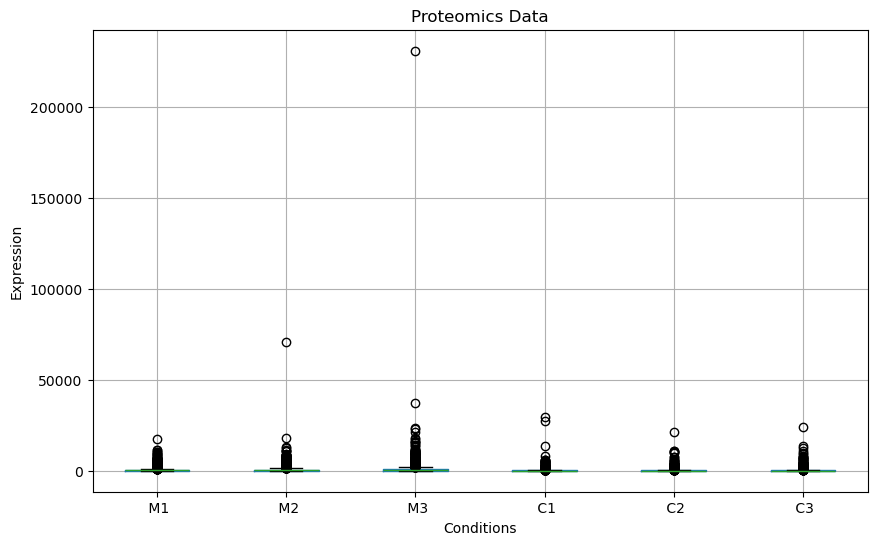

In [11]:
# Plot a boxplot for all proteins
counts.boxplot(figsize=(10, 6))  # You can adjust the figsize for larger datasets

# Add labels and title
plt.title('Proteomics Data')
plt.xlabel('Conditions')
plt.ylabel('Expression')

# Show the plot
plt.show()

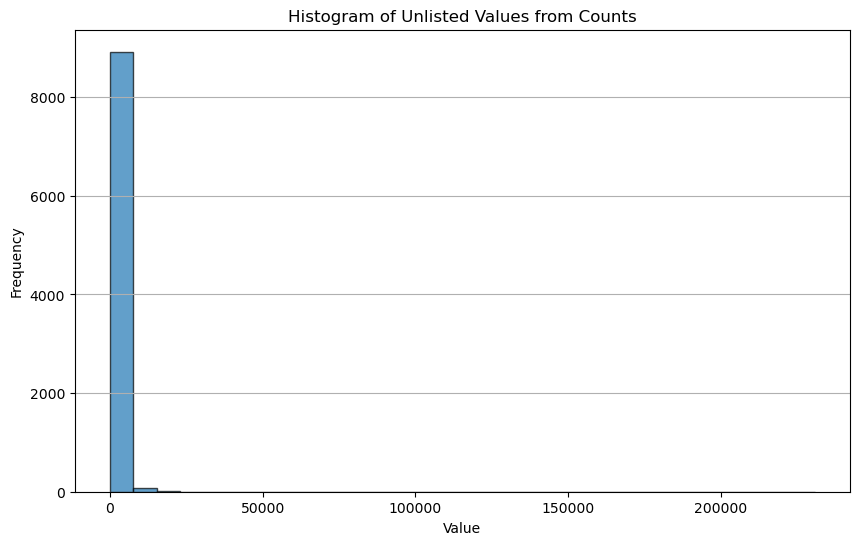

In [12]:
unlisted_data = counts.values.flatten()

# Step 5: Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(unlisted_data, bins=30, edgecolor='black', alpha=0.7)  # Adjust bins as needed
plt.title('Histogram of Unlisted Values from Counts')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')

# Show the plot
plt.show()

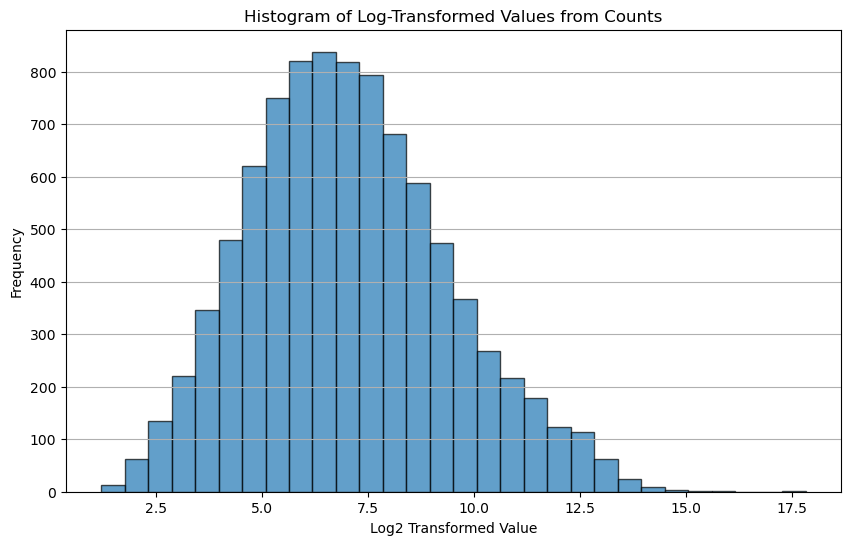

In [13]:
log_transformed_data = np.log2(counts + 1)

# Step 5: Flatten the log-transformed data
unlisted_log_data = log_transformed_data.values.flatten()  # Use .values to get a NumPy array and flatten it

# Step 6: Create a histogram of the log-transformed data
plt.figure(figsize=(10, 6))
plt.hist(unlisted_log_data, bins=30, edgecolor='black', alpha=0.7)  # Adjust bins as needed
plt.title('Histogram of Log-Transformed Values from Counts')
plt.xlabel('Log2 Transformed Value')
plt.ylabel('Frequency')
plt.grid(axis='y')

# Show the plot
plt.show()

In [14]:
counts_log = np.log2(counts + 1)
counts_log = counts_log.T
counts_log.T

,,M1,M2,M3,C1,C2,C3
Accession,Description,,,,,,
Q8VDD5,Myosin-9 OS=Mus musculus OX=10090 GN=Myh9 PE=1 SV=4,10.920948,16.111816,17.816137,11.150192,10.894515,11.760304
Q9JMH9,Unconventional myosin-XVIIIa OS=Mus musculus OX=10090 GN=Myo18a PE=1 SV=2,9.970106,13.679513,15.178338,9.591148,9.288635,9.490650
P08032,"Spectrin alpha chain, erythrocytic 1 OS=Mus musculus OX=10090 GN=Spta1 PE=1 SV=3",9.524542,12.686391,14.506562,8.303324,8.180904,10.101976
Q9JKF1,Ras GTPase-activating-like protein IQGAP1 OS=Mus musculus OX=10090 GN=Iqgap1 PE=1 SV=2,12.849952,12.603835,12.789106,13.724023,12.183263,12.115434
O08638,Myosin-11 OS=Mus musculus OX=10090 GN=Myh11 PE=1 SV=1,6.153805,10.470456,12.520668,5.697663,4.572890,5.569856
...,...,...,...,...,...,...,...
Q3U108,AT-rich interactive domain-containing protein 5A OS=Mus musculus OX=10090 GN=Arid5a PE=1 SV=1,7.609548,7.912291,8.470862,2.867896,3.608809,3.643856
Q5ND52,"rRNA methyltransferase 3, mitochondrial OS=Mus musculus OX=10090 GN=Mrm3 PE=2 SV=1",7.663914,7.670302,8.084808,3.137504,2.906891,2.405992
Q99PH1,Leucine-rich repeat-containing protein 4 OS=Mus musculus OX=10090 GN=Lrrc4 PE=1 SV=2,7.525129,5.697663,6.024586,7.365448,7.044394,6.493455


In [15]:
counts_log

Accession,Q8VDD5,Q9JMH9,P08032,Q9JKF1,O08638,Q62261,P60710,P01027,E9Q557,Q9D154,...,Q8C7R4,Q8BFZ2,F6XLV1,Q8VI75,P23607,Q3U108,Q5ND52,Q99PH1,P97930,Q8BIJ7
Description,Myosin-9 OS=Mus musculus OX=10090 GN=Myh9 PE=1 SV=4,Unconventional myosin-XVIIIa OS=Mus musculus OX=10090 GN=Myo18a PE=1 SV=2,"Spectrin alpha chain, erythrocytic 1 OS=Mus musculus OX=10090 GN=Spta1 PE=1 SV=3",Ras GTPase-activating-like protein IQGAP1 OS=Mus musculus OX=10090 GN=Iqgap1 PE=1 SV=2,Myosin-11 OS=Mus musculus OX=10090 GN=Myh11 PE=1 SV=1,"Spectrin beta chain, non-erythrocytic 1 OS=Mus musculus OX=10090 GN=Sptbn1 PE=1 SV=2","Actin, cytoplasmic 1 OS=Mus musculus OX=10090 GN=Actb PE=1 SV=1",Complement C3 OS=Mus musculus OX=10090 GN=C3 PE=1 SV=3,Desmoplakin OS=Mus musculus OX=10090 GN=Dsp PE=1 SV=1,Leukocyte elastase inhibitor A OS=Mus musculus OX=10090 GN=Serpinb1a PE=1 SV=1,...,Ubiquitin-like modifier-activating enzyme 6 OS=Mus musculus OX=10090 GN=Uba6 PE=1 SV=1,Phospholipid phosphatase-related protein type 1 OS=Mus musculus OX=10090 GN=Plppr1 PE=1 SV=1,Ciliary rootlet coiled-coil protein 2 OS=Mus musculus OX=10090 GN=Crocc2 PE=3 SV=2,Importin-4 OS=Mus musculus OX=10090 GN=Ipo4 PE=1 SV=1,Zinc finger autosomal protein OS=Mus musculus OX=10090 GN=Zfa PE=3 SV=1,AT-rich interactive domain-containing protein 5A OS=Mus musculus OX=10090 GN=Arid5a PE=1 SV=1,"rRNA methyltransferase 3, mitochondrial OS=Mus musculus OX=10090 GN=Mrm3 PE=2 SV=1",Leucine-rich repeat-containing protein 4 OS=Mus musculus OX=10090 GN=Lrrc4 PE=1 SV=2,Thymidylate kinase OS=Mus musculus OX=10090 GN=Dtymk PE=1 SV=2,RUN and FYVE domain-containing protein 1 OS=Mus musculus OX=10090 GN=Rufy1 PE=1 SV=1
M1,10.920948,9.970106,9.524542,12.849952,6.153805,8.909293,8.668885,12.161888,12.459867,7.532940,...,9.644397,3.185867,1.887525,6.980711,7.312883,7.609548,7.663914,7.525129,4.590961,6.543805
M2,16.111816,13.679513,12.686391,12.603835,10.470456,12.081084,12.408913,12.286240,11.445118,7.566054,...,7.394891,5.169925,6.205549,6.298292,6.806066,7.912291,7.670302,5.697663,4.852998,6.539159
M3,17.816137,15.178338,14.506562,12.789106,12.520668,14.112106,14.083670,12.485251,12.806429,8.365010,...,8.564912,7.025693,7.628628,7.888743,7.426265,8.470862,8.084808,6.024586,4.986411,6.683696
C1,11.150192,9.591148,8.303324,13.724023,5.697663,8.510171,8.666757,12.344407,12.454042,14.739628,...,7.627169,2.632268,2.350497,7.034524,6.431289,2.867896,3.137504,7.365448,3.432959,2.963474
C2,10.894515,9.288635,8.180904,12.183263,4.572890,8.718704,8.234099,12.873982,11.923142,10.894590,...,7.445429,2.678072,2.350497,6.488644,6.040016,3.608809,2.906891,7.044394,3.510962,2.459432
C3,11.760304,9.490650,10.101976,12.115434,5.569856,9.246978,8.599913,12.728665,12.360161,13.388636,...,8.318769,2.608809,3.711495,7.482203,6.274262,3.643856,2.405992,6.493455,3.847997,2.485427


In [17]:
scaler = StandardScaler()
counts_scaled = scaler.fit_transform(counts_log)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(counts_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, 
                      columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Display the explained variance for each principal component
explained_variance

array([6.40857268e-01, 1.57090181e-01, 9.71108367e-02, 6.52172141e-02,
       3.97245006e-02, 1.01856776e-32])

<Figure size 800x600 with 0 Axes>

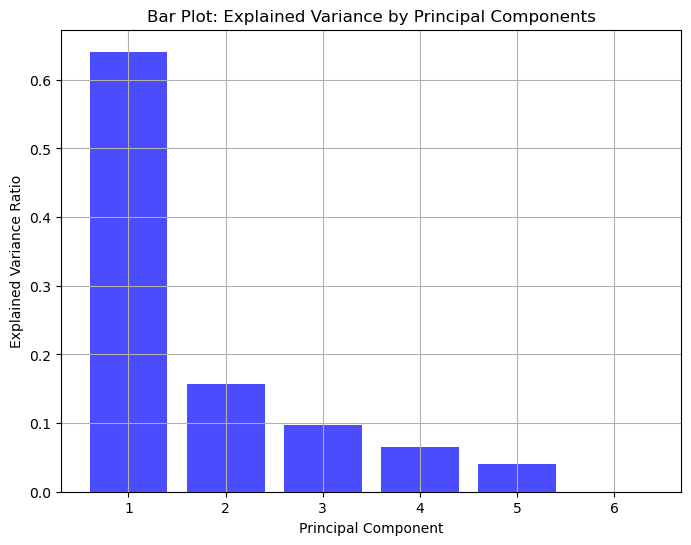

In [18]:
plt.figure(figsize=(8,6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='b')
plt.title('Bar Plot: Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))  # Set x-axis ticks to match component numbers
plt.grid(True)
plt.show()

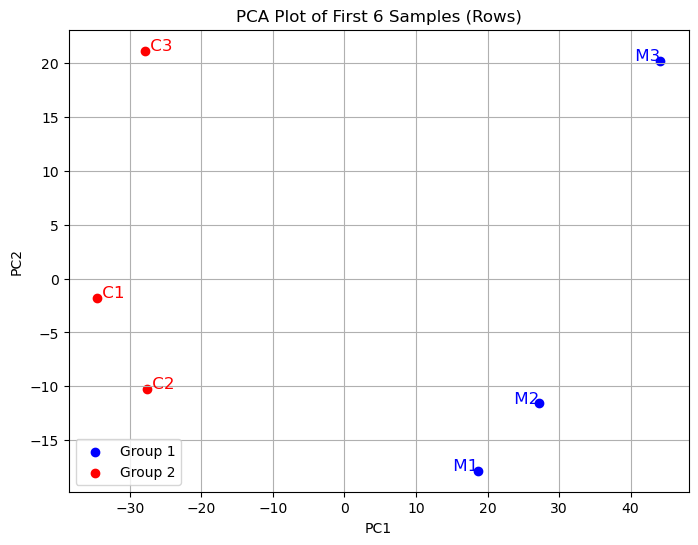

In [19]:
col1 = "blue"  # Group 1 color
col2 = "red"   # Group 2 color

# Prepare the scatter plot for the first 6 rows (samples)
plt.figure(figsize=(8,6))

# Plot the first 3 samples (rows 1-3) from Group 1
plt.scatter(principal_components[0:3, 0], principal_components[0:3, 1], color=col1, label='Group 1')

# Plot the next 3 samples (rows 4-6) from Group 2
plt.scatter(principal_components[3:6, 0], principal_components[3:6, 1], color=col2, label='Group 2')

# Add labels for Group 1 (first 3 rows)
for i in range(3):
    plt.text(principal_components[i, 0], principal_components[i, 1], counts_log.index[i], 
             color=col1, fontsize=12, ha='right')

# Add labels for Group 2 (next 3 rows)
for i in range(3, 6):
    plt.text(principal_components[i, 0], principal_components[i, 1], counts_log.index[i], 
             color=col2, fontsize=12, ha='left')

# Labels for axes
plt.xlabel("PC1")
plt.ylabel("PC2")

# Add legend and show plot
plt.legend()
plt.grid(True)
plt.title("PCA Plot of First 6 Samples (Rows)")
plt.show()

In [21]:
# Step 1: Calculate the mean across columns 1 to 3 (M) and columns 4 to 6 (Hypoxia)
mean_M = counts.iloc[:, 0:3].mean(axis=1)
mean_C = counts.iloc[:, 3:6].mean(axis=1)

# Step 2: Create a new DataFrame with Accession, counts, mean_C, and mean_M
counts_out = pd.concat([
    counts,               # Adding the entire exprdata DataFrame
    mean_M.rename('mean_M'),  # Adding mean_M column
    mean_C.rename('mean_C')   # Adding mean_C column
], axis=1)

# Step 3: Display the first few rows (equivalent to head() in R)
counts_out.head()

,,M1,M2,M3,C1,C2,C3,mean_M,mean_C
Accession,Description,,,,,,,,
Q8VDD5,Myosin-9 OS=Mus musculus OX=10090 GN=Myh9 PE=1 SV=4,1937.8,70816.4,230775.6,2271.7,1902.6,3468.0,101176.600000,2547.433333
Q9JMH9,Unconventional myosin-XVIIIa OS=Mus musculus OX=10090 GN=Myo18a PE=1 SV=2,1002.0,13119.3,37078.6,770.3,624.4,718.4,17066.633333,704.366667
P08032,"Spectrin alpha chain, erythrocytic 1 OS=Mus musculus OX=10090 GN=Spta1 PE=1 SV=3",735.5,6590.5,23275.1,314.9,289.2,1098.0,10200.366667,567.366667
Q9JKF1,Ras GTPase-activating-like protein IQGAP1 OS=Mus musculus OX=10090 GN=Iqgap1 PE=1 SV=2,7381.8,6223.9,7076.9,13530.4,4649.8,4436.2,6894.200000,7538.800000
O08638,Myosin-11 OS=Mus musculus OX=10090 GN=Myh11 PE=1 SV=1,70.2,1417.8,5875.2,50.9,22.8,46.5,2454.400000,40.066667


In [22]:
# Step 1: Add a new column for log2 Fold Change (log2FC)
counts_out['log2FC'] = np.log2(counts_out['mean_M'] / counts_out['mean_C'])

# Step 2: Display the first few rows (equivalent to head() in R)
counts_out.head()

,,M1,M2,M3,C1,C2,C3,mean_M,mean_C,log2FC
Accession,Description,,,,,,,,,
Q8VDD5,Myosin-9 OS=Mus musculus OX=10090 GN=Myh9 PE=1 SV=4,1937.8,70816.4,230775.6,2271.7,1902.6,3468.0,101176.600000,2547.433333,5.311687
Q9JMH9,Unconventional myosin-XVIIIa OS=Mus musculus OX=10090 GN=Myo18a PE=1 SV=2,1002.0,13119.3,37078.6,770.3,624.4,718.4,17066.633333,704.366667,4.598708
P08032,"Spectrin alpha chain, erythrocytic 1 OS=Mus musculus OX=10090 GN=Spta1 PE=1 SV=3",735.5,6590.5,23275.1,314.9,289.2,1098.0,10200.366667,567.366667,4.168196
Q9JKF1,Ras GTPase-activating-like protein IQGAP1 OS=Mus musculus OX=10090 GN=Iqgap1 PE=1 SV=2,7381.8,6223.9,7076.9,13530.4,4649.8,4436.2,6894.200000,7538.800000,-0.128952
O08638,Myosin-11 OS=Mus musculus OX=10090 GN=Myh11 PE=1 SV=1,70.2,1417.8,5875.2,50.9,22.8,46.5,2454.400000,40.066667,5.936824


In [23]:
# Define the Fold Change threshold
FC = 2  # Change this value as needed

# Filter the DataFrame for log2FC > FC
upregulated = counts_out[counts_out['log2FC'] > FC]

# Filter the DataFrame for log2FC < -FC
downregulated = counts_out[counts_out['log2FC'] < -FC]

# Display the results
print("Upregulated genes (log2FC > FC):")
print(upregulated)

print("\nDownregulated genes (log2FC < -FC):")
print(downregulated)

Upregulated genes (log2FC > FC):
                                                                  M1       M2  \
Accession Description                                                           
Q8VDD5    Myosin-9 OS=Mus musculus OX=10090 GN=Myh9 PE=1 ...  1937.8  70816.4   
Q9JMH9    Unconventional myosin-XVIIIa OS=Mus musculus OX...  1002.0  13119.3   
P08032    Spectrin alpha chain, erythrocytic 1 OS=Mus mus...   735.5   6590.5   
O08638    Myosin-11 OS=Mus musculus OX=10090 GN=Myh11 PE=...    70.2   1417.8   
Q62261    Spectrin beta chain, non-erythrocytic 1 OS=Mus ...   479.8   4331.8   
...                                                              ...      ...   
Q8BFZ2    Phospholipid phosphatase-related protein type 1...     8.1     35.0   
F6XLV1    Ciliary rootlet coiled-coil protein 2 OS=Mus mu...     2.7     72.8   
Q3U108    AT-rich interactive domain-containing protein 5...   194.3    239.9   
Q5ND52    rRNA methyltransferase 3, mitochondrial OS=Mus ...   201.8    202.

In [24]:
# Step 3: Define a function to perform t-test and return p-value
def get_pvalue(row):
    # Perform t-test on the first three and last three elements
    return stats.ttest_ind(row[:3], row[3:]).pvalue

# Step 4: Apply the function to each row in exprdata_log
p_values = counts_log.T.apply(get_pvalue, axis=1)

# Step 5: Add p-values to exprdata_out
counts_out['pvalue'] = p_values

# Display the updated exprdata_out DataFrame
counts_out

,,M1,M2,M3,C1,C2,C3,mean_M,mean_C,log2FC,pvalue
Accession,Description,,,,,,,,,,
Q8VDD5,Myosin-9 OS=Mus musculus OX=10090 GN=Myh9 PE=1 SV=4,1937.8,70816.4,230775.6,2271.7,1902.6,3468.0,101176.600000,2547.433333,5.311687,0.152879
Q9JMH9,Unconventional myosin-XVIIIa OS=Mus musculus OX=10090 GN=Myo18a PE=1 SV=2,1002.0,13119.3,37078.6,770.3,624.4,718.4,17066.633333,704.366667,4.598708,0.087823
P08032,"Spectrin alpha chain, erythrocytic 1 OS=Mus musculus OX=10090 GN=Spta1 PE=1 SV=3",735.5,6590.5,23275.1,314.9,289.2,1098.0,10200.366667,567.366667,4.168196,0.099739
Q9JKF1,Ras GTPase-activating-like protein IQGAP1 OS=Mus musculus OX=10090 GN=Iqgap1 PE=1 SV=2,7381.8,6223.9,7076.9,13530.4,4649.8,4436.2,6894.200000,7538.800000,-0.128952,0.896644
O08638,Myosin-11 OS=Mus musculus OX=10090 GN=Myh11 PE=1 SV=1,70.2,1417.8,5875.2,50.9,22.8,46.5,2454.400000,40.066667,5.936824,0.080941
...,...,...,...,...,...,...,...,...,...,...,...
Q3U108,AT-rich interactive domain-containing protein 5A OS=Mus musculus OX=10090 GN=Arid5a PE=1 SV=1,194.3,239.9,353.8,6.3,11.2,11.5,262.666667,9.666667,4.764071,0.000206
Q5ND52,"rRNA methyltransferase 3, mitochondrial OS=Mus musculus OX=10090 GN=Mrm3 PE=2 SV=1",201.8,202.7,270.5,7.8,6.5,4.3,225.000000,6.200000,5.181513,0.000041
Q99PH1,Leucine-rich repeat-containing protein 4 OS=Mus musculus OX=10090 GN=Lrrc4 PE=1 SV=2,183.2,50.9,64.1,163.9,131.0,89.1,99.400000,128.000000,-0.364826,0.421957


In [25]:
from statsmodels.stats.multitest import multipletests

In [26]:
# Step 3: Apply FDR adjustment using Benjamini-Hochberg method
counts_out['fdr'] = multipletests(counts_out['pvalue'], method='fdr_bh')[1]

# Step 4: Display the updated DataFrame
counts_out

,,M1,M2,M3,C1,C2,C3,mean_M,mean_C,log2FC,pvalue,fdr
Accession,Description,,,,,,,,,,,
Q8VDD5,Myosin-9 OS=Mus musculus OX=10090 GN=Myh9 PE=1 SV=4,1937.8,70816.4,230775.6,2271.7,1902.6,3468.0,101176.600000,2547.433333,5.311687,0.152879,0.221005
Q9JMH9,Unconventional myosin-XVIIIa OS=Mus musculus OX=10090 GN=Myo18a PE=1 SV=2,1002.0,13119.3,37078.6,770.3,624.4,718.4,17066.633333,704.366667,4.598708,0.087823,0.143070
P08032,"Spectrin alpha chain, erythrocytic 1 OS=Mus musculus OX=10090 GN=Spta1 PE=1 SV=3",735.5,6590.5,23275.1,314.9,289.2,1098.0,10200.366667,567.366667,4.168196,0.099739,0.157859
Q9JKF1,Ras GTPase-activating-like protein IQGAP1 OS=Mus musculus OX=10090 GN=Iqgap1 PE=1 SV=2,7381.8,6223.9,7076.9,13530.4,4649.8,4436.2,6894.200000,7538.800000,-0.128952,0.896644,0.926194
O08638,Myosin-11 OS=Mus musculus OX=10090 GN=Myh11 PE=1 SV=1,70.2,1417.8,5875.2,50.9,22.8,46.5,2454.400000,40.066667,5.936824,0.080941,0.134782
...,...,...,...,...,...,...,...,...,...,...,...,...
Q3U108,AT-rich interactive domain-containing protein 5A OS=Mus musculus OX=10090 GN=Arid5a PE=1 SV=1,194.3,239.9,353.8,6.3,11.2,11.5,262.666667,9.666667,4.764071,0.000206,0.002692
Q5ND52,"rRNA methyltransferase 3, mitochondrial OS=Mus musculus OX=10090 GN=Mrm3 PE=2 SV=1",201.8,202.7,270.5,7.8,6.5,4.3,225.000000,6.200000,5.181513,0.000041,0.001448
Q99PH1,Leucine-rich repeat-containing protein 4 OS=Mus musculus OX=10090 GN=Lrrc4 PE=1 SV=2,183.2,50.9,64.1,163.9,131.0,89.1,99.400000,128.000000,-0.364826,0.421957,0.507836


In [123]:
# Step 3: Define the threshold
alfa = 0.05  # Change this value as needed

# Step 4: Count how many p-values and fdr values are below the threshold
count_pvalue_below_alfa = (counts_out['pvalue'] < alfa).sum()
count_fdr_below_alfa = (counts_out['fdr'] < alfa).sum()

# Step 5: Display the results
print(f"Number of p-values below {alfa}: {count_pvalue_below_alfa}")
print(f"Number of FDR values below {alfa}: {count_fdr_below_alfa}")

Number of p-values below 0.05: 800
Number of FDR values below 0.05: 686


In [27]:
!pip install openpyxl

In [28]:
import openpyxl

In [29]:
filtered_set = counts_log.T[counts_out['fdr'] < 0.05]
filtered_set

,,M1,M2,M3,C1,C2,C3
Accession,Description,,,,,,
Q9D154,Leukocyte elastase inhibitor A OS=Mus musculus OX=10090 GN=Serpinb1a PE=1 SV=1,7.532940,7.566054,8.365010,14.739628,10.894590,13.388636
Q3UQ44,Ras GTPase-activating-like protein IQGAP2 OS=Mus musculus OX=10090 GN=Iqgap2 PE=1 SV=2,12.267723,12.433507,12.484571,10.303324,11.033974,9.431080
P26041,Moesin OS=Mus musculus OX=10090 GN=Msn PE=1 SV=3,10.600842,10.600842,10.752130,11.980889,11.813661,12.677962
P63017,Heat shock cognate 71 kDa protein OS=Mus musculus OX=10090 GN=Hspa8 PE=1 SV=1,12.746556,13.049185,13.804494,11.287828,11.317413,11.637259
P68372,Tubulin beta-4B chain OS=Mus musculus OX=10090 GN=Tubb4b PE=1 SV=1,9.634630,10.151397,10.385000,7.157852,6.944858,7.181898
...,...,...,...,...,...,...,...
P23607,Zinc finger autosomal protein OS=Mus musculus OX=10090 GN=Zfa PE=3 SV=1,7.312883,6.806066,7.426265,6.431289,6.040016,6.274262
Q3U108,AT-rich interactive domain-containing protein 5A OS=Mus musculus OX=10090 GN=Arid5a PE=1 SV=1,7.609548,7.912291,8.470862,2.867896,3.608809,3.643856
Q5ND52,"rRNA methyltransferase 3, mitochondrial OS=Mus musculus OX=10090 GN=Mrm3 PE=2 SV=1",7.663914,7.670302,8.084808,3.137504,2.906891,2.405992


In [30]:
allcounts_out = counts_out.reset_index()
allcounts_out

,Accession,Description,M1,M2,M3,C1,C2,C3,mean_M,mean_C,log2FC,pvalue,fdr
0,Q8VDD5,Myosin-9 OS=Mus musculus OX=10090 GN=Myh9 PE=1...,1937.8,70816.4,230775.6,2271.7,1902.6,3468.0,101176.600000,2547.433333,5.311687,0.152879,0.221005
1,Q9JMH9,Unconventional myosin-XVIIIa OS=Mus musculus O...,1002.0,13119.3,37078.6,770.3,624.4,718.4,17066.633333,704.366667,4.598708,0.087823,0.143070
2,P08032,"Spectrin alpha chain, erythrocytic 1 OS=Mus mu...",735.5,6590.5,23275.1,314.9,289.2,1098.0,10200.366667,567.366667,4.168196,0.099739,0.157859
3,Q9JKF1,Ras GTPase-activating-like protein IQGAP1 OS=M...,7381.8,6223.9,7076.9,13530.4,4649.8,4436.2,6894.200000,7538.800000,-0.128952,0.896644,0.926194
4,O08638,Myosin-11 OS=Mus musculus OX=10090 GN=Myh11 PE...,70.2,1417.8,5875.2,50.9,22.8,46.5,2454.400000,40.066667,5.936824,0.080941,0.134782
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,Q3U108,AT-rich interactive domain-containing protein ...,194.3,239.9,353.8,6.3,11.2,11.5,262.666667,9.666667,4.764071,0.000206,0.002692
1498,Q5ND52,"rRNA methyltransferase 3, mitochondrial OS=Mus...",201.8,202.7,270.5,7.8,6.5,4.3,225.000000,6.200000,5.181513,0.000041,0.001448
1499,Q99PH1,Leucine-rich repeat-containing protein 4 OS=Mu...,183.2,50.9,64.1,163.9,131.0,89.1,99.400000,128.000000,-0.364826,0.421957,0.507836
1500,P97930,Thymidylate kinase OS=Mus musculus OX=10090 GN...,23.1,27.9,30.7,9.8,10.4,13.4,27.233333,11.200000,1.281875,0.002150,0.010002


In [167]:
# Set row names based on the 'Accession' column in exprdata_out
filtered_set.index = allcounts_out[allcounts_out['fdr'] < 0.05]['Accession']
filtered_set

,M1,M2,M3,C1,C2,C3
Accession,,,,,,
Q9D154,7.532940,7.566054,8.365010,14.739628,10.894590,13.388636
Q3UQ44,12.267723,12.433507,12.484571,10.303324,11.033974,9.431080
P26041,10.600842,10.600842,10.752130,11.980889,11.813661,12.677962
P63017,12.746556,13.049185,13.804494,11.287828,11.317413,11.637259
P68372,9.634630,10.151397,10.385000,7.157852,6.944858,7.181898
...,...,...,...,...,...,...
P23607,7.312883,6.806066,7.426265,6.431289,6.040016,6.274262
Q3U108,7.609548,7.912291,8.470862,2.867896,3.608809,3.643856
Q5ND52,7.663914,7.670302,8.084808,3.137504,2.906891,2.405992


In [31]:
set_out = filtered_set.reset_index()
set_out

,Accession,Description,M1,M2,M3,C1,C2,C3
0,Q9D154,Leukocyte elastase inhibitor A OS=Mus musculus...,7.532940,7.566054,8.365010,14.739628,10.894590,13.388636
1,Q3UQ44,Ras GTPase-activating-like protein IQGAP2 OS=M...,12.267723,12.433507,12.484571,10.303324,11.033974,9.431080
2,P26041,Moesin OS=Mus musculus OX=10090 GN=Msn PE=1 SV=3,10.600842,10.600842,10.752130,11.980889,11.813661,12.677962
3,P63017,Heat shock cognate 71 kDa protein OS=Mus muscu...,12.746556,13.049185,13.804494,11.287828,11.317413,11.637259
4,P68372,Tubulin beta-4B chain OS=Mus musculus OX=10090...,9.634630,10.151397,10.385000,7.157852,6.944858,7.181898
...,...,...,...,...,...,...,...,...
681,P23607,Zinc finger autosomal protein OS=Mus musculus ...,7.312883,6.806066,7.426265,6.431289,6.040016,6.274262
682,Q3U108,AT-rich interactive domain-containing protein ...,7.609548,7.912291,8.470862,2.867896,3.608809,3.643856
683,Q5ND52,"rRNA methyltransferase 3, mitochondrial OS=Mus...",7.663914,7.670302,8.084808,3.137504,2.906891,2.405992
684,P97930,Thymidylate kinase OS=Mus musculus OX=10090 GN...,4.590961,4.852998,4.986411,3.432959,3.510962,3.847997


In [32]:
# Convert filtered_set to a NumPy matrix (heatdata2)
heatdata2 = set_out.values

# Show the matrix
heatdata2

array([['Q9D154',
        'Leukocyte elastase inhibitor A OS=Mus musculus OX=10090 GN=Serpinb1a PE=1 SV=1',
        7.532940288372874, ..., 14.739627684431, 10.894590430002713,
        13.388636219462803],
       ['Q3UQ44',
        'Ras GTPase-activating-like protein IQGAP2 OS=Mus musculus OX=10090 GN=Iqgap2 PE=1 SV=2',
        12.267723051627422, ..., 10.303324126859511, 11.033973543441055,
        9.431079674057884],
       ['P26041', 'Moesin OS=Mus musculus OX=10090 GN=Msn PE=1 SV=3',
        10.600842114387302, ..., 11.980889298541905, 11.813660961620661,
        12.677961832017077],
       ...,
       ['Q5ND52',
        'rRNA methyltransferase 3, mitochondrial OS=Mus musculus OX=10090 GN=Mrm3 PE=2 SV=1',
        7.663913842115978, ..., 3.137503523749935, 2.9068905956085187,
        2.4059923596758366],
       ['P97930',
        'Thymidylate kinase OS=Mus musculus OX=10090 GN=Dtymk PE=1 SV=2',
        4.590961241342599, ..., 3.4329594072761065, 3.5109619192773796,
        3.8479969

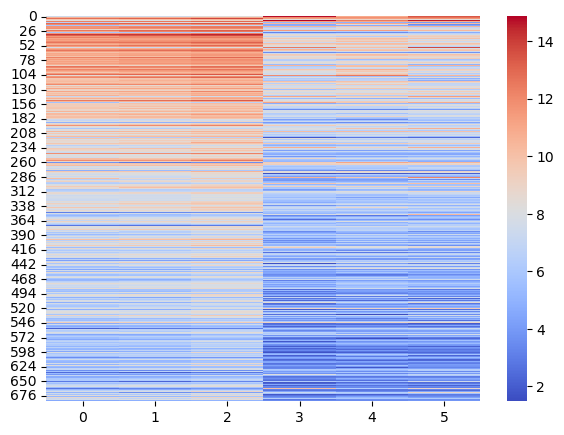

In [33]:
# Assuming filtered_set is a pandas DataFrame
# Filter out non-numeric columns from filtered_set
heatdata2_numeric = set_out.select_dtypes(include=[float, int]).to_numpy()

# Create the heatmap with numeric data
plt.figure(figsize=(7, 5))  # Adjust the figure size
sns.heatmap(heatdata2_numeric, cmap='coolwarm', cbar=True)

# Display the plot
plt.show()

In [39]:
# Step 1: Filter the data for fdr < 0.05 and log2FC conditions
filtered_set_upregulated = counts_log.T[(counts_out['fdr'] < 0.05) & (counts_out['log2FC'] > 0)]
filtered_set_downregulated = counts_log.T[(counts_out['fdr'] < 0.05) & (counts_out['log2FC'] < 0)]

# Step 2: Combine the upregulated and downregulated sets
filtered_setdiff = pd.concat([filtered_set_upregulated, filtered_set_downregulated], axis=0)
filtered_setdiff

,,M1,M2,M3,C1,C2,C3
Accession,Description,,,,,,
Q3UQ44,Ras GTPase-activating-like protein IQGAP2 OS=Mus musculus OX=10090 GN=Iqgap2 PE=1 SV=2,12.267723,12.433507,12.484571,10.303324,11.033974,9.431080
P63017,Heat shock cognate 71 kDa protein OS=Mus musculus OX=10090 GN=Hspa8 PE=1 SV=1,12.746556,13.049185,13.804494,11.287828,11.317413,11.637259
P68372,Tubulin beta-4B chain OS=Mus musculus OX=10090 GN=Tubb4b PE=1 SV=1,9.634630,10.151397,10.385000,7.157852,6.944858,7.181898
P99024,Tubulin beta-5 chain OS=Mus musculus OX=10090 GN=Tubb5 PE=1 SV=1,9.786270,10.142107,10.530211,8.159871,8.935165,8.295998
P97351,40S ribosomal protein S3a OS=Mus musculus OX=10090 GN=Rps3a PE=1 SV=3,13.496330,13.606463,13.952286,9.367852,9.128768,9.181401
...,...,...,...,...,...,...,...
P68404,Protein kinase C beta type OS=Mus musculus OX=10090 GN=Prkcb PE=1 SV=4,3.906891,4.129283,4.217231,8.186857,5.916477,6.867896
Q6PF93,Phosphatidylinositol 3-kinase catalytic subunit type 3 OS=Mus musculus OX=10090 GN=Pik3c3 PE=1 SV=1,2.944858,2.263034,3.307429,6.261155,5.658211,7.496654
Q3V0C5,Ubiquitin carboxyl-terminal hydrolase 48 OS=Mus musculus OX=10090 GN=Usp48 PE=1 SV=2,2.744161,3.350497,3.847997,10.097505,6.350497,8.805744


In [37]:
# Step 1: Filter the data for fdr < 0.05
filtered_counts_out = counts_out[counts_out['fdr'] < 0.05]

# Step 2: Select most upregulated (top 10) and downregulated (top 10) proteins
top_55_upregulated = filtered_counts_out.nlargest(55, 'log2FC')
top_55_downregulated = filtered_counts_out.nsmallest(55, 'log2FC')

# Step 3: Keep the counts_log.T for the selected proteins
upregulated_proteins55 = counts_log.T.loc[top_55_upregulated.index]
downregulated_proteins55 = counts_log.T.loc[top_55_downregulated.index]

# Step 2: Combine the top 10 upregulated and downregulated proteins
combined_updownproteins55 = pd.concat([upregulated_proteins55, downregulated_proteins55])

In [38]:
combined_updownproteins55

,,M1,M2,M3,C1,C2,C3
Accession,Description,,,,,,
Q9D937,Uncharacterized protein C11orf98 homolog OS=Mus musculus OX=10090 PE=1 SV=1,11.853037,11.920576,12.252222,4.882643,4.655352,4.596935
P62862,40S ribosomal protein S30 OS=Mus musculus OX=10090 GN=Fau PE=1 SV=1,11.961920,11.738346,12.532307,5.412782,4.963474,5.193772
Q9DB42,Zinc finger protein 593 OS=Mus musculus OX=10090 GN=Znf593 PE=1 SV=2,9.546123,9.074141,9.594138,1.887525,1.807355,3.666757
Q6ZWV3,60S ribosomal protein L10 OS=Mus musculus OX=10090 GN=Rpl10 PE=1 SV=3,9.983421,10.443462,10.705460,3.536053,3.935460,3.765535
Q8BIZ6,Smad nuclear-interacting protein 1 OS=Mus musculus OX=10090 GN=Snip1 PE=1 SV=1,7.755555,8.018478,8.641691,1.632268,1.887525,2.104337
...,...,...,...,...,...,...,...
P08003,Protein disulfide-isomerase A4 OS=Mus musculus OX=10090 GN=Pdia4 PE=1 SV=3,9.029839,8.993788,9.672072,10.481295,10.029563,10.583365
Q9ESX5,H/ACA ribonucleoprotein complex subunit DKC1 OS=Mus musculus OX=10090 GN=Dkc1 PE=1 SV=4,5.716991,5.449561,6.024586,6.339850,6.954196,6.986411
Q99KN1,Arrestin domain-containing protein 1 OS=Mus musculus OX=10090 GN=Arrdc1 PE=1 SV=2,7.010108,7.016808,7.179909,7.640968,8.311521,8.157852


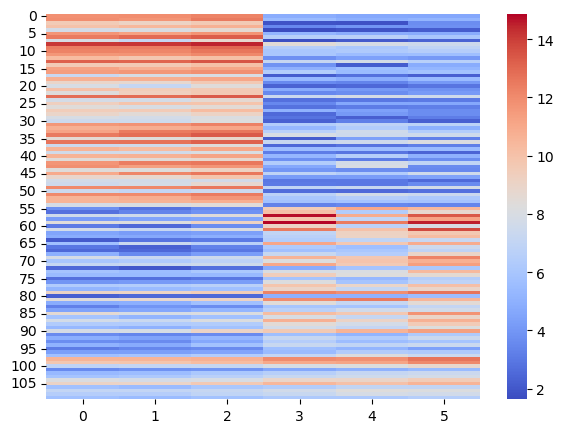

In [40]:
# Filter out non-numeric columns from filtered_set
heatdata6_numeric = combined_updownproteins55.select_dtypes(include=[float, int]).to_numpy()

# Create the heatmap with numeric data
plt.figure(figsize=(7, 5))  # Adjust the figure size
sns.heatmap(heatdata6_numeric, cmap='coolwarm', cbar=True)

# Display the plot
plt.show()

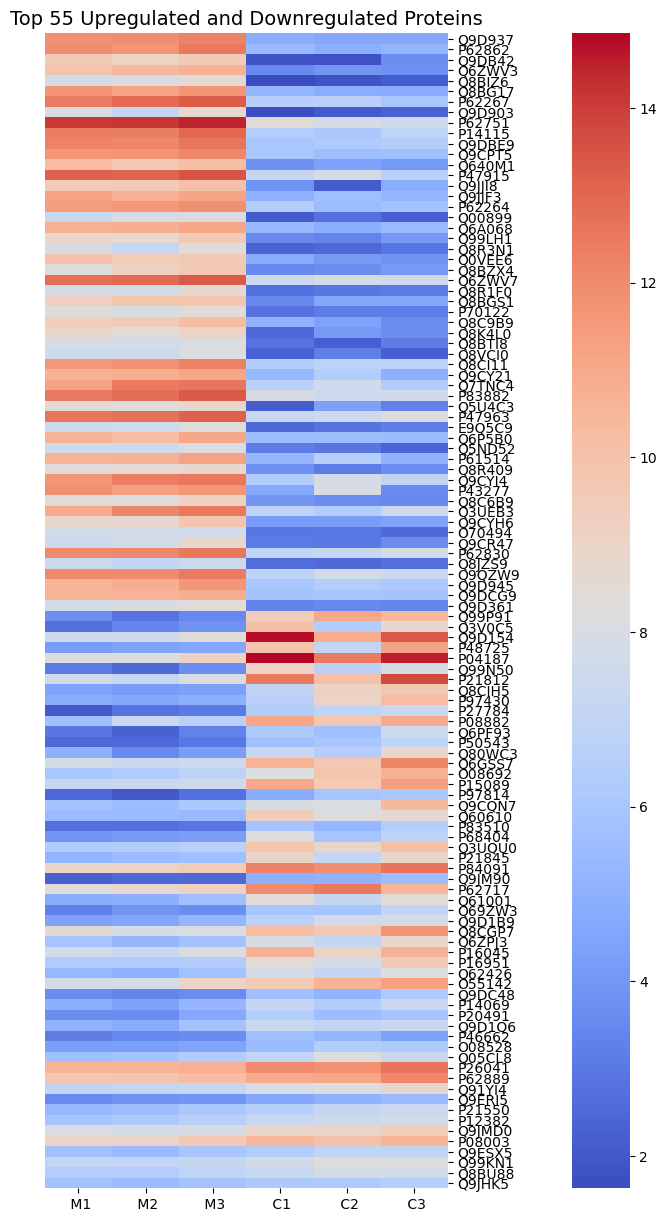

In [41]:
# Extract Accession labels if using MultiIndex
accession_labels = combined_updownproteins55.index.get_level_values(0)  # Change '0' if accessions are on a different level

# Create the heatmap with Accession labels on the y-axis and column names on the x-axis
plt.figure(figsize=(8, 15))  # Adjust the figure size
heatmap = sns.heatmap(
    heatdata6_numeric, 
    cmap='coolwarm', 
    cbar=True, 
    yticklabels=accession_labels,
    xticklabels=combined_updownproteins55.columns,  # Use column names for x-axis labels
    cbar_kws={"pad": 0.2}  # Adjust the pad value to increase space between heatmap and colorbar
)

# Move y-tick labels to the right
heatmap.yaxis.tick_right()
heatmap.yaxis.set_ticks_position('right')

# Set y-tick label rotation to horizontal
plt.yticks(rotation=0)  # Set rotation to 0 degrees for horizontal labels

# Set plot title
plt.title('Top 55 Upregulated and Downregulated Proteins', fontsize=14)

# Display the heatmap
plt.show()

In [42]:
combined55 = combined_updownproteins55.reset_index()
combined55

,Accession,Description,M1,M2,M3,C1,C2,C3
0,Q9D937,Uncharacterized protein C11orf98 homolog OS=Mu...,11.853037,11.920576,12.252222,4.882643,4.655352,4.596935
1,P62862,40S ribosomal protein S30 OS=Mus musculus OX=1...,11.961920,11.738346,12.532307,5.412782,4.963474,5.193772
2,Q9DB42,Zinc finger protein 593 OS=Mus musculus OX=100...,9.546123,9.074141,9.594138,1.887525,1.807355,3.666757
3,Q6ZWV3,60S ribosomal protein L10 OS=Mus musculus OX=1...,9.983421,10.443462,10.705460,3.536053,3.935460,3.765535
4,Q8BIZ6,Smad nuclear-interacting protein 1 OS=Mus musc...,7.755555,8.018478,8.641691,1.632268,1.887525,2.104337
...,...,...,...,...,...,...,...,...
105,P08003,Protein disulfide-isomerase A4 OS=Mus musculus...,9.029839,8.993788,9.672072,10.481295,10.029563,10.583365
106,Q9ESX5,H/ACA ribonucleoprotein complex subunit DKC1 O...,5.716991,5.449561,6.024586,6.339850,6.954196,6.986411
107,Q99KN1,Arrestin domain-containing protein 1 OS=Mus mu...,7.010108,7.016808,7.179909,7.640968,8.311521,8.157852
108,Q8BU88,"39S ribosomal protein L22, mitochondrial OS=Mu...",6.462707,6.446256,6.928370,7.229780,7.862327,7.638074


In [43]:
Name = combined55['Description'].str.extract(r'GN:\s*([a-zA-Z0-9_]+)')
Name

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
105,NaN
106,NaN
107,NaN
108,NaN


In [44]:
Name['Name'] = combined55['Description'].str.extract(r'GN\s*=\s*([^\s,]+)')
Name

,0,Name
0,NaN,NaN
1,NaN,Fau
2,NaN,Znf593
3,NaN,Rpl10
4,NaN,Snip1
...,...,...
105,NaN,Pdia4
106,NaN,Dkc1
107,NaN,Arrdc1
108,NaN,Mrpl22


In [45]:
# Add the gene name for the first row
Name.at[0, 'Name'] = 'C11orf98'  # Replace 'Gene_Name' with the correct column name
Name

,0,Name
0,NaN,C11orf98
1,NaN,Fau
2,NaN,Znf593
3,NaN,Rpl10
4,NaN,Snip1
...,...,...
105,NaN,Pdia4
106,NaN,Dkc1
107,NaN,Arrdc1
108,NaN,Mrpl22


In [46]:
# Keep only the 'gene_name' column in counts DataFrame
Name = Name[['Name']]

# Display the updated counts DataFrame
Name

,Name
0,C11orf98
1,Fau
2,Znf593
3,Rpl10
4,Snip1
...,...
105,Pdia4
106,Dkc1
107,Arrdc1
108,Mrpl22


In [47]:
# Add gene_name column from counts DataFrame to combined50 DataFrame
combined55['Name'] = Name['Name']

# Display the updated combined50 DataFrame
combined55

,Accession,Description,M1,M2,M3,C1,C2,C3,Name
0,Q9D937,Uncharacterized protein C11orf98 homolog OS=Mu...,11.853037,11.920576,12.252222,4.882643,4.655352,4.596935,C11orf98
1,P62862,40S ribosomal protein S30 OS=Mus musculus OX=1...,11.961920,11.738346,12.532307,5.412782,4.963474,5.193772,Fau
2,Q9DB42,Zinc finger protein 593 OS=Mus musculus OX=100...,9.546123,9.074141,9.594138,1.887525,1.807355,3.666757,Znf593
3,Q6ZWV3,60S ribosomal protein L10 OS=Mus musculus OX=1...,9.983421,10.443462,10.705460,3.536053,3.935460,3.765535,Rpl10
4,Q8BIZ6,Smad nuclear-interacting protein 1 OS=Mus musc...,7.755555,8.018478,8.641691,1.632268,1.887525,2.104337,Snip1
...,...,...,...,...,...,...,...,...,...
105,P08003,Protein disulfide-isomerase A4 OS=Mus musculus...,9.029839,8.993788,9.672072,10.481295,10.029563,10.583365,Pdia4
106,Q9ESX5,H/ACA ribonucleoprotein complex subunit DKC1 O...,5.716991,5.449561,6.024586,6.339850,6.954196,6.986411,Dkc1
107,Q99KN1,Arrestin domain-containing protein 1 OS=Mus mu...,7.010108,7.016808,7.179909,7.640968,8.311521,8.157852,Arrdc1
108,Q8BU88,"39S ribosomal protein L22, mitochondrial OS=Mu...",6.462707,6.446256,6.928370,7.229780,7.862327,7.638074,Mrpl22


In [48]:
# Convert gene names to uppercase
combined55['Name'] = combined55['Name'].str.upper()

# Display the updated combined50 DataFrame
combined55

,Accession,Description,M1,M2,M3,C1,C2,C3,Name
0,Q9D937,Uncharacterized protein C11orf98 homolog OS=Mu...,11.853037,11.920576,12.252222,4.882643,4.655352,4.596935,C11ORF98
1,P62862,40S ribosomal protein S30 OS=Mus musculus OX=1...,11.961920,11.738346,12.532307,5.412782,4.963474,5.193772,FAU
2,Q9DB42,Zinc finger protein 593 OS=Mus musculus OX=100...,9.546123,9.074141,9.594138,1.887525,1.807355,3.666757,ZNF593
3,Q6ZWV3,60S ribosomal protein L10 OS=Mus musculus OX=1...,9.983421,10.443462,10.705460,3.536053,3.935460,3.765535,RPL10
4,Q8BIZ6,Smad nuclear-interacting protein 1 OS=Mus musc...,7.755555,8.018478,8.641691,1.632268,1.887525,2.104337,SNIP1
...,...,...,...,...,...,...,...,...,...
105,P08003,Protein disulfide-isomerase A4 OS=Mus musculus...,9.029839,8.993788,9.672072,10.481295,10.029563,10.583365,PDIA4
106,Q9ESX5,H/ACA ribonucleoprotein complex subunit DKC1 O...,5.716991,5.449561,6.024586,6.339850,6.954196,6.986411,DKC1
107,Q99KN1,Arrestin domain-containing protein 1 OS=Mus mu...,7.010108,7.016808,7.179909,7.640968,8.311521,8.157852,ARRDC1
108,Q8BU88,"39S ribosomal protein L22, mitochondrial OS=Mu...",6.462707,6.446256,6.928370,7.229780,7.862327,7.638074,MRPL22


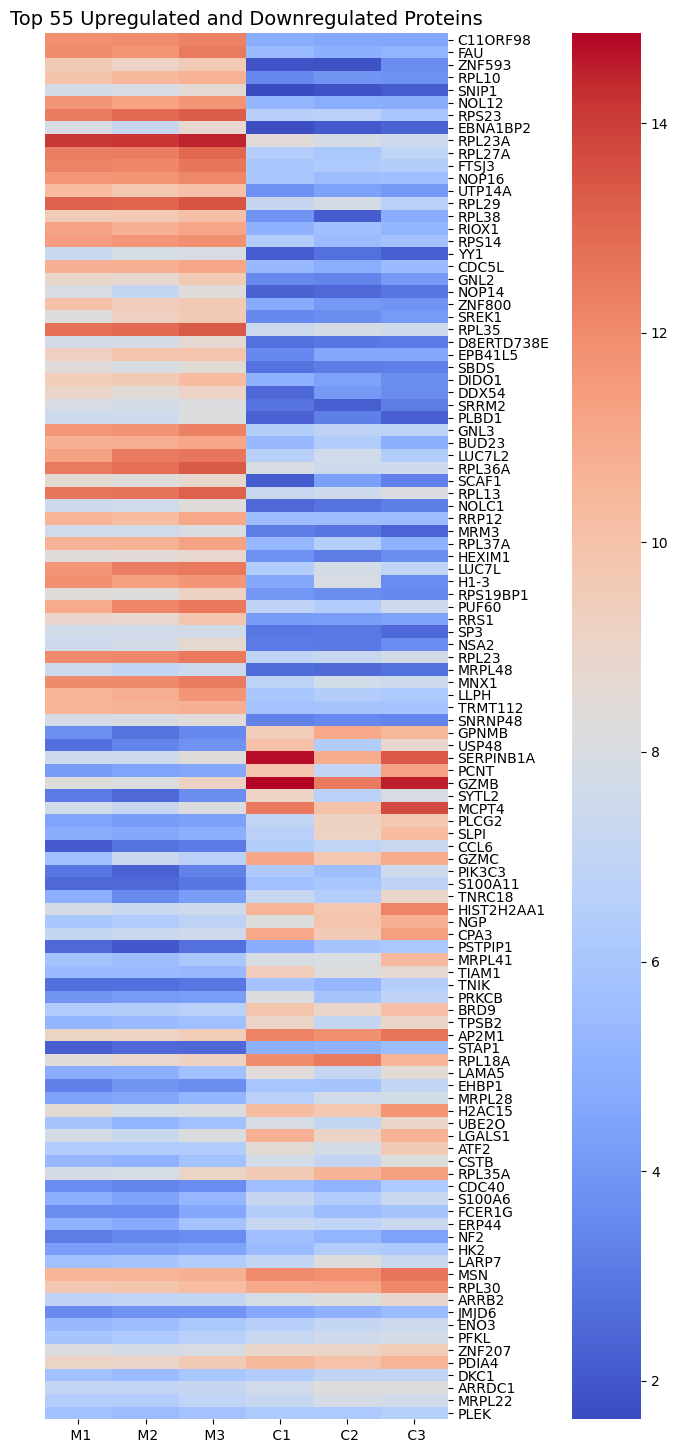

In [49]:
# Extract gene names from the combined50 DataFrame for y-axis labels
Name = combined55['Name'].values  # Get the values as a numpy array

# Create the heatmap with gene names on the y-axis and column names on the x-axis
plt.figure(figsize=(8, 18))  # Adjust the figure size
heatmap = sns.heatmap(
    heatdata6_numeric, 
    cmap='coolwarm', 
    cbar=True, 
    yticklabels=Name,  # Use gene names for y-axis labels
    xticklabels=combined_updownproteins55.columns,  # Use column names for x-axis labels
    cbar_kws={"pad": 0.2}  # Adjust the pad value to increase space between heatmap and colorbar
)

# Move y-tick labels to the right
heatmap.yaxis.tick_right()
heatmap.yaxis.set_ticks_position('right')

# Set y-tick label rotation to horizontal
plt.yticks(rotation=0)  # Set rotation to 0 degrees for horizontal labels

# Set plot title
plt.title('Top 55 Upregulated and Downregulated Proteins', fontsize=14)

# Display the heatmap
plt.show()

In [50]:
Symbol = allcounts_out['Description'].str.extract(r'GN:\s*([a-zA-Z0-9_]+)')
Symbol

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1497,NaN
1498,NaN
1499,NaN
1500,NaN


In [51]:
Symbol['Symbol'] = allcounts_out['Description'].str.extract(r'GN\s*=\s*([^\s,]+)')
Symbol

,0,Symbol
0,NaN,Myh9
1,NaN,Myo18a
2,NaN,Spta1
3,NaN,Iqgap1
4,NaN,Myh11
...,...,...
1497,NaN,Arid5a
1498,NaN,Mrm3
1499,NaN,Lrrc4
1500,NaN,Dtymk


In [52]:
# Keep only the 'gene_name' column in counts DataFrame
Symbol = Symbol[['Symbol']]

# Display the updated counts DataFrame
Symbol

,Symbol
0,Myh9
1,Myo18a
2,Spta1
3,Iqgap1
4,Myh11
...,...
1497,Arid5a
1498,Mrm3
1499,Lrrc4
1500,Dtymk


In [53]:
# Add gene_name column from counts DataFrame to combined50 DataFrame
allcounts_out['Symbol'] = Symbol['Symbol']

# Display the updated combined50 DataFrame
allcounts_out

,Accession,Description,M1,M2,M3,C1,C2,C3,mean_M,mean_C,log2FC,pvalue,fdr,Symbol
0,Q8VDD5,Myosin-9 OS=Mus musculus OX=10090 GN=Myh9 PE=1...,1937.8,70816.4,230775.6,2271.7,1902.6,3468.0,101176.600000,2547.433333,5.311687,0.152879,0.221005,Myh9
1,Q9JMH9,Unconventional myosin-XVIIIa OS=Mus musculus O...,1002.0,13119.3,37078.6,770.3,624.4,718.4,17066.633333,704.366667,4.598708,0.087823,0.143070,Myo18a
2,P08032,"Spectrin alpha chain, erythrocytic 1 OS=Mus mu...",735.5,6590.5,23275.1,314.9,289.2,1098.0,10200.366667,567.366667,4.168196,0.099739,0.157859,Spta1
3,Q9JKF1,Ras GTPase-activating-like protein IQGAP1 OS=M...,7381.8,6223.9,7076.9,13530.4,4649.8,4436.2,6894.200000,7538.800000,-0.128952,0.896644,0.926194,Iqgap1
4,O08638,Myosin-11 OS=Mus musculus OX=10090 GN=Myh11 PE...,70.2,1417.8,5875.2,50.9,22.8,46.5,2454.400000,40.066667,5.936824,0.080941,0.134782,Myh11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,Q3U108,AT-rich interactive domain-containing protein ...,194.3,239.9,353.8,6.3,11.2,11.5,262.666667,9.666667,4.764071,0.000206,0.002692,Arid5a
1498,Q5ND52,"rRNA methyltransferase 3, mitochondrial OS=Mus...",201.8,202.7,270.5,7.8,6.5,4.3,225.000000,6.200000,5.181513,0.000041,0.001448,Mrm3
1499,Q99PH1,Leucine-rich repeat-containing protein 4 OS=Mu...,183.2,50.9,64.1,163.9,131.0,89.1,99.400000,128.000000,-0.364826,0.421957,0.507836,Lrrc4
1500,P97930,Thymidylate kinase OS=Mus musculus OX=10090 GN...,23.1,27.9,30.7,9.8,10.4,13.4,27.233333,11.200000,1.281875,0.002150,0.010002,Dtymk


In [54]:
# Convert gene names to uppercase
allcounts_out['Symbol'] = allcounts_out['Symbol'].str.upper()

# Display the updated combined50 DataFrame
allcounts_out

,Accession,Description,M1,M2,M3,C1,C2,C3,mean_M,mean_C,log2FC,pvalue,fdr,Symbol
0,Q8VDD5,Myosin-9 OS=Mus musculus OX=10090 GN=Myh9 PE=1...,1937.8,70816.4,230775.6,2271.7,1902.6,3468.0,101176.600000,2547.433333,5.311687,0.152879,0.221005,MYH9
1,Q9JMH9,Unconventional myosin-XVIIIa OS=Mus musculus O...,1002.0,13119.3,37078.6,770.3,624.4,718.4,17066.633333,704.366667,4.598708,0.087823,0.143070,MYO18A
2,P08032,"Spectrin alpha chain, erythrocytic 1 OS=Mus mu...",735.5,6590.5,23275.1,314.9,289.2,1098.0,10200.366667,567.366667,4.168196,0.099739,0.157859,SPTA1
3,Q9JKF1,Ras GTPase-activating-like protein IQGAP1 OS=M...,7381.8,6223.9,7076.9,13530.4,4649.8,4436.2,6894.200000,7538.800000,-0.128952,0.896644,0.926194,IQGAP1
4,O08638,Myosin-11 OS=Mus musculus OX=10090 GN=Myh11 PE...,70.2,1417.8,5875.2,50.9,22.8,46.5,2454.400000,40.066667,5.936824,0.080941,0.134782,MYH11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,Q3U108,AT-rich interactive domain-containing protein ...,194.3,239.9,353.8,6.3,11.2,11.5,262.666667,9.666667,4.764071,0.000206,0.002692,ARID5A
1498,Q5ND52,"rRNA methyltransferase 3, mitochondrial OS=Mus...",201.8,202.7,270.5,7.8,6.5,4.3,225.000000,6.200000,5.181513,0.000041,0.001448,MRM3
1499,Q99PH1,Leucine-rich repeat-containing protein 4 OS=Mu...,183.2,50.9,64.1,163.9,131.0,89.1,99.400000,128.000000,-0.364826,0.421957,0.507836,LRRC4
1500,P97930,Thymidylate kinase OS=Mus musculus OX=10090 GN...,23.1,27.9,30.7,9.8,10.4,13.4,27.233333,11.200000,1.281875,0.002150,0.010002,DTYMK


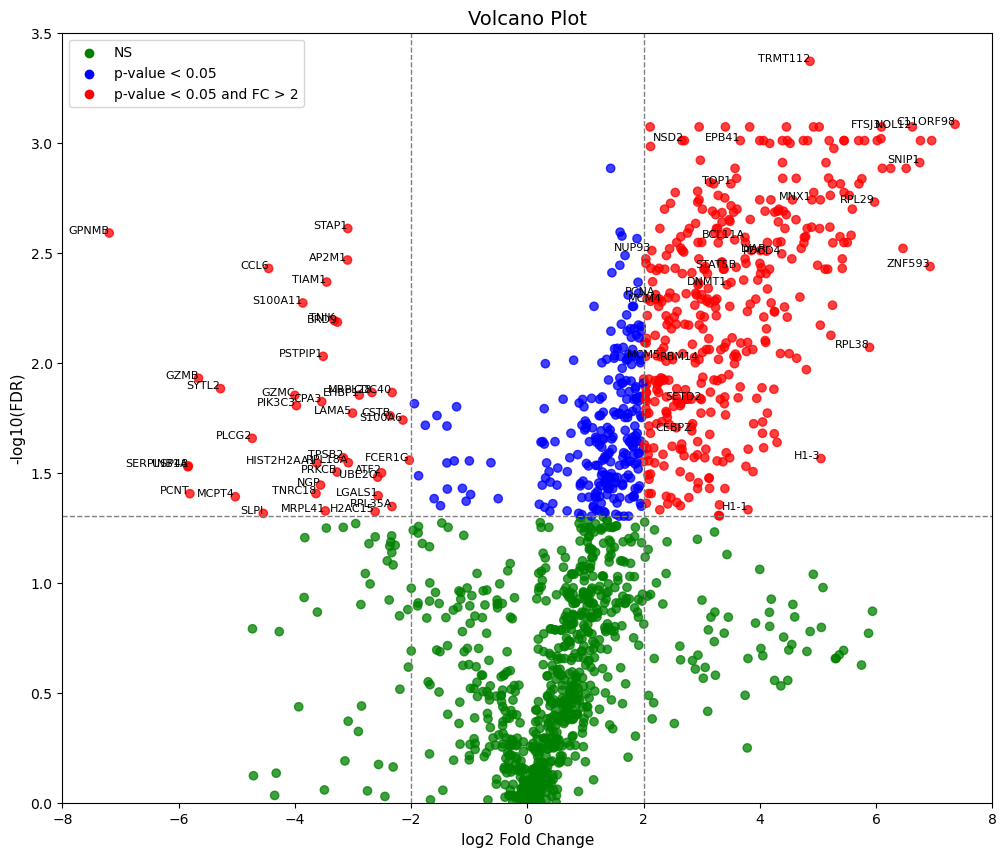

In [55]:
# Set your thresholds (adjust according to your data)
pCutoff = 0.05
FCcutoff = 2.0  # Log2 fold-change cutoff

# Create a new column to indicate significance based on thresholds
allcounts_out['significant'] = (allcounts_out['fdr'] < pCutoff) & (abs(allcounts_out['log2FC']) > FCcutoff)
allcounts_out['pval_significant'] = (allcounts_out['fdr'] < pCutoff) & (abs(allcounts_out['log2FC']) <= FCcutoff)

# Merge DataFrames on the 'Accession' column
merged_data = allcounts_out.merge(combined55, on='Accession', how='left')

# Define colors: 
# Red for significant points (both fdr < 0.05 and |log2FC| > 2), 
# Blue for points with fdr < 0.05 but not |log2FC| > 2,
# Green for non-significant points
colors = np.where(merged_data['significant'], 'red', 
         np.where(merged_data['pval_significant'], 'blue', 'green'))

# List of upregulated proteins to label manually
upregulated_proteins_to_label = ['MNX1', 'TRMT112', 'C11ORF98', 'NOL12', 'FTSJ3', 'RPL38', 'SNIP1', 'ZNF593', 'RPL29', 'H1-3', 'PDCD4', 'LYAR', 'H1-1', 'EPB41', 'STAT5B', 'TOP1', 'DNMT1', 'SETD2', 'CEBPZ', 'NSD2', 'ISG20I2', 'MCM4', 'MCM5', 'PCNA', 'NUP93', 'RBM14', 'BCL11A']  # Replace with actual protein names

# Create the plot
plt.figure(figsize=(12, 10))

# Scatter plot: log2FC on x-axis, -log10(fdr) on y-axis
plt.scatter(merged_data['log2FC'], -np.log10(merged_data['fdr']), c=colors, alpha=0.75)

# Add a dashed horizontal line for pCutoff = 0.05
plt.axhline(y=-np.log10(pCutoff), color='grey', linestyle='--', linewidth=1)

# Add dashed vertical lines for FCcutoff = 2.0 and -2.0
plt.axvline(x=FCcutoff, color='grey', linestyle='--', linewidth=1)
plt.axvline(x=-FCcutoff, color='grey', linestyle='--', linewidth=1)

# Add labels for selected upregulated proteins and all significant downregulated proteins
for i in range(len(merged_data)):
    # Get the name to label
    protein_name = merged_data['Name'].iloc[i] if pd.notna(merged_data['Name'].iloc[i]) else merged_data['Symbol'].iloc[i]
    
    # Label selected upregulated proteins or downregulated significant proteins
    if (protein_name in upregulated_proteins_to_label) or \
       (merged_data['log2FC'].iloc[i] < -FCcutoff and merged_data['significant'].iloc[i]):  # Check for downregulated
        plt.text(merged_data['log2FC'].iloc[i], -np.log10(merged_data['fdr']).iloc[i], 
                 protein_name, fontsize=8, ha='right')

# Set axis labels
plt.xlabel('log2 Fold Change', fontsize=11)
plt.ylabel('-log10(FDR)', fontsize=11)

# Set x and y axis limits
plt.xlim([-8, 8])  # Adjust limits as needed
plt.ylim([0, 3.5])   # Adjust limits as needed

# Add title
plt.title('Volcano Plot', fontsize=14)  # You can replace this with your desired title

# Custom legend entries
green_patch = plt.scatter([], [], color='green', label='NS')  # Non-significant
blue_patch = plt.scatter([], [], color='blue', label='p-value < 0.05')  # p-value < 0.05, but |log2FC| <= 2
red_patch = plt.scatter([], [], color='red', label='p-value < 0.05 and FC > 2')  # p-value < 0.05 and |log2FC| > 2

# Add the legend with the custom patches
plt.legend(handles=[green_patch, blue_patch, red_patch], loc='upper left')

# Show plot
plt.show()

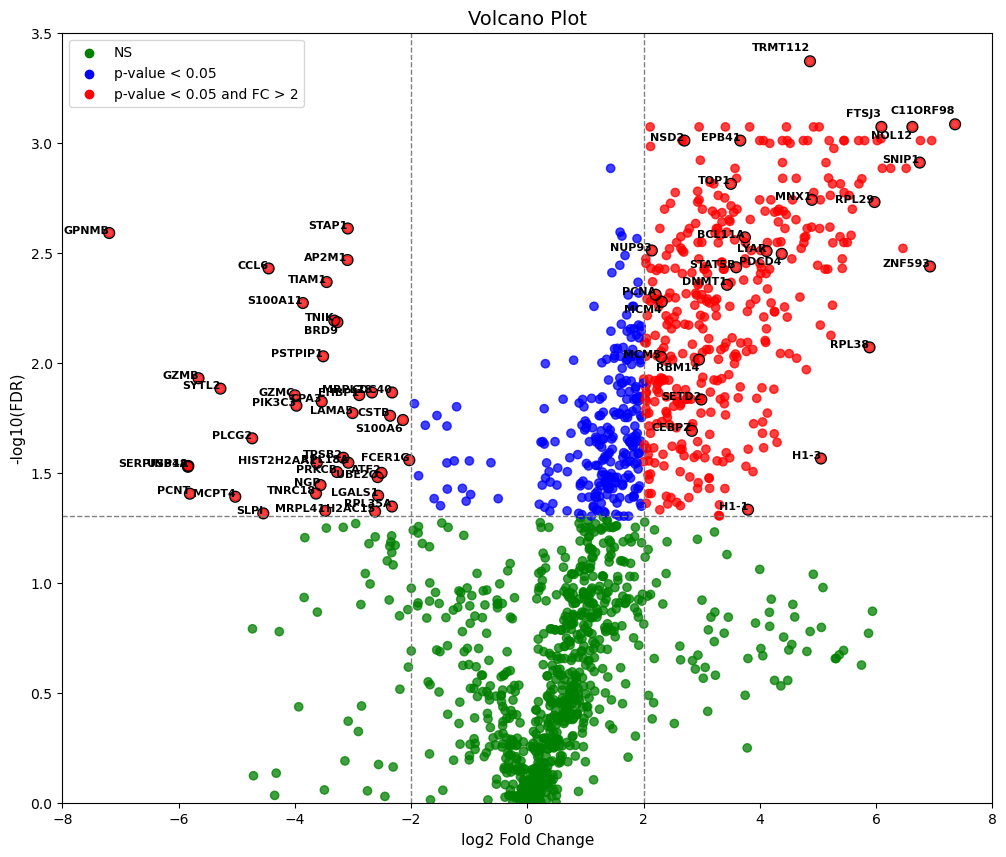

In [56]:
# Create the plot
plt.figure(figsize=(12, 10))

# Scatter plot: log2FC on x-axis, -log10(fdr) on y-axis (main points without outlines)
plt.scatter(merged_data['log2FC'], -np.log10(merged_data['fdr']), c=colors, alpha=0.75)

# Add a dashed horizontal line for pCutoff = 0.05
plt.axhline(y=-np.log10(pCutoff), color='grey', linestyle='--', linewidth=1)

# Add dashed vertical lines for FCcutoff = 2.0 and -2.0
plt.axvline(x=FCcutoff, color='grey', linestyle='--', linewidth=1)
plt.axvline(x=-FCcutoff, color='grey', linestyle='--', linewidth=1)

# List to store coordinates of labeled points
labeled_points_x = []
labeled_points_y = []

# Add labels for selected upregulated proteins and all significant downregulated proteins
for i in range(len(merged_data)):
    # Get the name to label
    protein_name = merged_data['Name'].iloc[i] if pd.notna(merged_data['Name'].iloc[i]) else merged_data['Symbol'].iloc[i]
    
    # Label selected upregulated proteins or downregulated significant proteins
    if (protein_name in upregulated_proteins_to_label) or \
       (merged_data['log2FC'].iloc[i] < -FCcutoff and merged_data['significant'].iloc[i]):  # Check for downregulated
        # Adjust label position for specific proteins
        if protein_name in ['NOL12', 'PDCD4', 'MCM4', 'RBM14', 'BRD9', 'S100A6']:
            offset = -0.05
        elif protein_name in ['FTSJ3', 'C11ORF98', 'TRMT112']:
            offset = 0.05
        else:
            offset = 0

        plt.text(merged_data['log2FC'].iloc[i], -np.log10(merged_data['fdr']).iloc[i] + offset, 
                 protein_name, fontsize=8, ha='right', fontweight='bold')
        
        # Store coordinates for labeled points
        labeled_points_x.append(merged_data['log2FC'].iloc[i])
        labeled_points_y.append(-np.log10(merged_data['fdr']).iloc[i])

# Create a scatter plot for labeled points with outlines
plt.scatter(labeled_points_x, labeled_points_y, edgecolor='black', facecolor='none', s=60, linewidth=1)

# Set axis labels
plt.xlabel('log2 Fold Change', fontsize=11)
plt.ylabel('-log10(FDR)', fontsize=11)

# Set x and y axis limits
plt.xlim([-8, 8])  # Adjust limits as needed
plt.ylim([0, 3.5])   # Adjust limits as needed

# Add title
plt.title('Volcano Plot', fontsize=14)  # You can replace this with your desired title

# Custom legend entries
green_patch = plt.scatter([], [], color='green', label='NS')  # Non-significant
blue_patch = plt.scatter([], [], color='blue', label='p-value < 0.05')  # p-value < 0.05, but |log2FC| <= 2
red_patch = plt.scatter([], [], color='red', label='p-value < 0.05 and FC > 2')  # p-value < 0.05 and |log2FC| > 2

# Add the legend with the custom patches
plt.legend(handles=[green_patch, blue_patch, red_patch], loc='upper left')

# Show plot
plt.show()


In [58]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


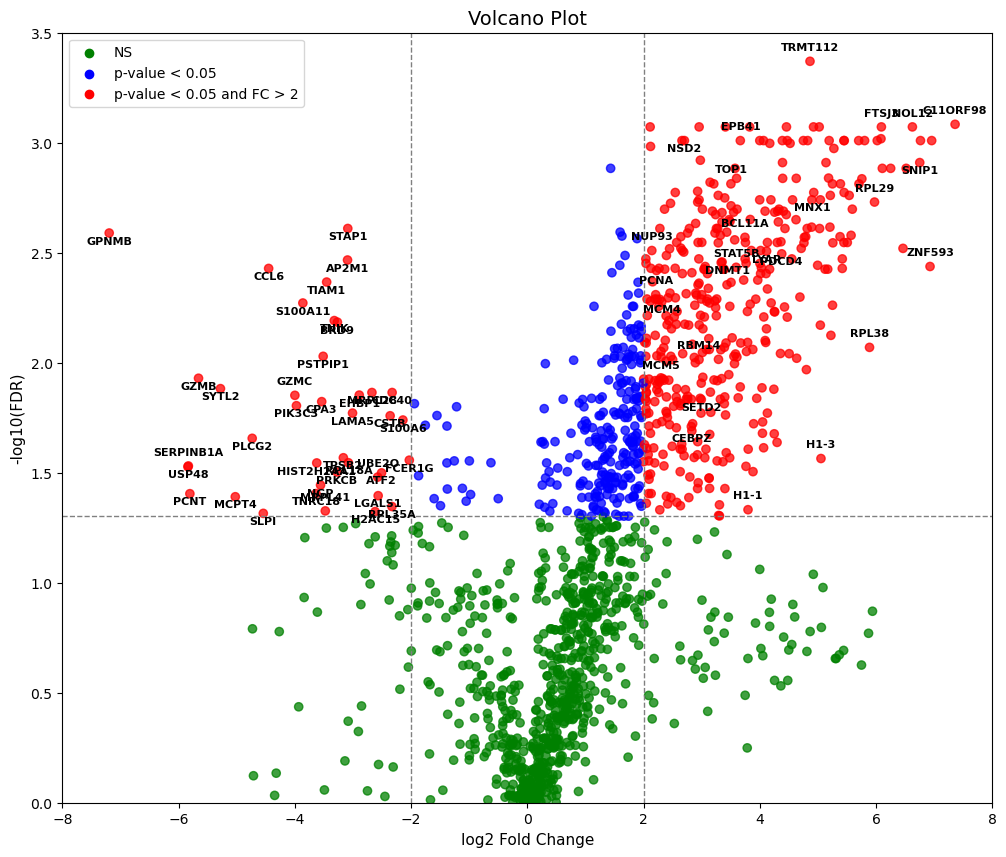

In [59]:
# Set your thresholds (adjust according to your data)
pCutoff = 0.05
FCcutoff = 2.0  # Log2 fold-change cutoff

# Create a new column to indicate significance based on thresholds
allcounts_out['significant'] = (allcounts_out['fdr'] < pCutoff) & (abs(allcounts_out['log2FC']) > FCcutoff)
allcounts_out['pval_significant'] = (allcounts_out['fdr'] < pCutoff) & (abs(allcounts_out['log2FC']) <= FCcutoff)

# Merge DataFrames on the 'Accession' column
merged_data = allcounts_out.merge(combined55, on='Accession', how='left')

# Define colors: 
colors = np.where(merged_data['significant'], 'red', 
         np.where(merged_data['pval_significant'], 'blue', 'green'))

# List of upregulated proteins to label manually
upregulated_proteins_to_label = ['MNX1', 'TRMT112', 'C11ORF98', 'NOL12', 'FTSJ3', 'RPL38', 'SNIP1', 'ZNF593', 
                                  'RPL29', 'H1-3', 'PDCD4', 'LYAR', 'H1-1', 'EPB41', 'STAT5B', 'TOP1', 
                                  'DNMT1', 'SETD2', 'CEBPZ', 'NSD2', 'ISG20I2', 'MCM4', 'MCM5', 'PCNA', 
                                  'NUP93', 'RBM14', 'BCL11A']  # Replace with actual protein names

# Create the plot
plt.figure(figsize=(12, 10))

# Scatter plot: log2FC on x-axis, -log10(fdr) on y-axis
plt.scatter(merged_data['log2FC'], -np.log10(merged_data['fdr']), c=colors, alpha=0.75)

# Add a dashed horizontal line for pCutoff = 0.05
plt.axhline(y=-np.log10(pCutoff), color='grey', linestyle='--', linewidth=1)

# Add dashed vertical lines for FCcutoff = 2.0 and -2.0
plt.axvline(x=FCcutoff, color='grey', linestyle='--', linewidth=1)
plt.axvline(x=-FCcutoff, color='grey', linestyle='--', linewidth=1)

# Add labels for selected upregulated proteins and all significant downregulated proteins
for i in range(len(merged_data)):
    protein_name = merged_data['Name'].iloc[i] if pd.notna(merged_data['Name'].iloc[i]) else merged_data['Symbol'].iloc[i]
    
    if (protein_name in upregulated_proteins_to_label) or \
       (merged_data['log2FC'].iloc[i] < -FCcutoff and merged_data['significant'].iloc[i]):
        # Adjust label position for specific proteins
        if protein_name in ['NOL12', 'PDCD4', 'MCM4', 'RBM14', 'BRD9', 'S100A6']:
            offset = -0.1
        elif protein_name in ['FTSJ3', 'C11ORF98', 'TRMT112']:
            offset = 0.05
        else:
            offset = 0
        
        # Get coordinates for the current point
        x = merged_data['log2FC'].iloc[i]
        y = -np.log10(merged_data['fdr']).iloc[i]
        
        # Offset position slightly above or below the point
        offset_y = 0.05 if protein_name in upregulated_proteins_to_label else -0.05
        
        # Check for potential overlap
        for j in range(len(merged_data)):
            if i != j:
                other_x = merged_data['log2FC'].iloc[j]
                other_y = -np.log10(merged_data['fdr']).iloc[j]
                # If the label's y-position overlaps with another point
                if abs(x - other_x) < 0.05 and abs((y + offset_y) - other_y) < 0.05:
                    offset_y = -0.05 if offset_y > 0 else 0.05  # Alternate direction
                
        plt.text(x, y + offset_y, protein_name, fontsize=8, ha='center', fontweight='bold')
        
       
# Set axis labels
plt.xlabel('log2 Fold Change', fontsize=11)
plt.ylabel('-log10(FDR)', fontsize=11)

# Set x and y axis limits
plt.xlim([-8, 8])  # Adjust limits as needed
plt.ylim([0, 3.5])   # Adjust limits as needed

# Add title
plt.title('Volcano Plot', fontsize=14)  # You can replace this with your desired title

# Custom legend entries
green_patch = plt.scatter([], [], color='green', label='NS')  # Non-significant
blue_patch = plt.scatter([], [], color='blue', label='p-value < 0.05')  # p-value < 0.05, but |log2FC| <= 2
red_patch = plt.scatter([], [], color='red', label='p-value < 0.05 and FC > 2')  # p-value < 0.05 and |log2FC| > 2

# Add the legend with the custom patches
plt.legend(handles=[green_patch, blue_patch, red_patch], loc='upper left')

# Show plot
plt.show()

In [1]:


# Set your thresholds (adjust according to your data)
pCutoff = 0.05
FCcutoff = 2.0  # Log2 fold-change cutoff

# Create a new column to indicate significance based on thresholds
allcounts_out['significant'] = (allcounts_out['fdr'] < pCutoff) & (abs(allcounts_out['log2FC']) > FCcutoff)
allcounts_out['pval_significant'] = (allcounts_out['fdr'] < pCutoff) & (abs(allcounts_out['log2FC']) <= FCcutoff)

# Merge DataFrames on the 'Accession' column
merged_data = allcounts_out.merge(combined55, on='Accession', how='left')

# Define colors: 
colors = np.where(merged_data['significant'], 'red', 
         np.where(merged_data['pval_significant'], 'blue', 'green'))

# List of upregulated proteins to label manually
upregulated_proteins_to_label = ['MNX1', 'TRMT112', 'C11ORF98', 'NOL12', 'FTSJ3', 'RPL38', 'SNIP1', 'ZNF593', 
                                  'RPL29', 'H1-3', 'PDCD4', 'LYAR', 'H1-1', 'EPB41', 'STAT5B', 'TOP1', 
                                  'DNMT1', 'SETD2', 'CEBPZ', 'NSD2', 'ISG20I2', 'MCM4', 'MCM5', 'PCNA', 
                                  'NUP93', 'RBM14', 'BCL11A']  # Replace with actual protein names

# Create the plot
plt.figure(figsize=(12, 10))

# Scatter plot: log2FC on x-axis, -log10(fdr) on y-axis
plt.scatter(merged_data['log2FC'], -np.log10(merged_data['fdr']), c=colors, alpha=0.75)

# Add a dashed horizontal line for pCutoff = 0.05
plt.axhline(y=-np.log10(pCutoff), color='grey', linestyle='--', linewidth=1)

# Add dashed vertical lines for FCcutoff = 2.0 and -2.0
plt.axvline(x=FCcutoff, color='grey', linestyle='--', linewidth=1)
plt.axvline(x=-FCcutoff, color='grey', linestyle='--', linewidth=1)

# Store positions of labels to check for overlap
label_positions = []

# Add labels for selected upregulated proteins and all significant downregulated proteins
for i in range(len(merged_data)):
    protein_name = merged_data['Name'].iloc[i] if pd.notna(merged_data['Name'].iloc[i]) else merged_data['Symbol'].iloc[i]
    
    if (protein_name in upregulated_proteins_to_label) or \
       (merged_data['log2FC'].iloc[i] < -FCcutoff and merged_data['significant'].iloc[i]):
        
        # Get coordinates for the current point
        x = merged_data['log2FC'].iloc[i]
        y = -np.log10(merged_data['fdr']).iloc[i]
        
        # Offset position slightly above or below the point
        offset_y = 0.1 if protein_name in upregulated_proteins_to_label else -0.1
        
        # Adjust the offset if there's overlap with previously placed labels
        overlap = True
        while overlap:
            overlap = False
            for label_x, label_y in label_positions:
                if abs(x - label_x) < 0.1 and abs((y + offset_y) - label_y) < 0.1:
                    overlap = True
                    offset_y = -offset_y  # Alternate direction to avoid overlap
                    break
        
        # Place the label and record its position
        plt.text(x, y + offset_y, protein_name, fontsize=8, ha='center', fontweight='bold')
        label_positions.append((x, y + offset_y))
        
# Set axis labels
plt.xlabel('log2 Fold Change', fontsize=11)
plt.ylabel('-log10(FDR)', fontsize=11)

# Set x and y axis limits
plt.xlim([-8, 8])  # Adjust limits as needed
plt.ylim([0, 3.5])   # Adjust limits as needed

# Add title
plt.title('Volcano Plot', fontsize=14)  # You can replace this with your desired title

# Custom legend entries
green_patch = plt.scatter([], [], color='green', label='NS')  # Non-significant
blue_patch = plt.scatter([], [], color='blue', label='p-value < 0.05')  # p-value < 0.05, but |log2FC| <= 2
red_patch = plt.scatter([], [], color='red', label='p-value < 0.05 and FC > 2')  # p-value < 0.05 and |log2FC| > 2

# Add the legend with the custom patches
plt.legend(handles=[green_patch, blue_patch, red_patch], loc='upper left')

# Show plot
plt.show()


NameError: name 'allcounts_out' is not defined